# KNN_from Scratch :

- 𝐊-𝐍𝐞𝐚𝐫𝐞𝐬𝐭 𝐍𝐞𝐢𝐠𝐡𝐛𝐨𝐫𝐬 (𝐊𝐍𝐍) :

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_classification

In [3]:
data = make_classification(n_samples=50, n_features=4, n_classes=2)

In [4]:
data

(array([[-2.83421586e-01, -5.41161795e-01,  3.76176322e-01,
          2.94693930e-01],
        [-5.32638043e-01, -1.32835012e+00,  8.02990646e-01,
          5.13131852e-01],
        [ 4.75972160e-01, -1.12842688e+00, -3.32004994e-03,
         -7.61161527e-01],
        [ 1.06972248e-01,  8.48423439e-01, -3.40686702e-01,
         -2.70362856e-02],
        [-1.20320989e+00, -8.14669388e-01,  1.13960958e+00,
          1.44485020e+00],
        [-4.82137225e-01, -1.04524923e+00,  6.78379362e-01,
          4.85020148e-01],
        [ 1.25048958e+00,  1.63468776e+00, -1.42746418e+00,
         -1.39863603e+00],
        [-1.41661641e+00,  7.51422380e-01,  8.14076318e-01,
          1.92468120e+00],
        [-1.23595170e+00, -1.33707390e-01,  9.53727910e-01,
          1.57606371e+00],
        [ 7.28591812e-01, -1.32289873e+00, -1.29836956e-01,
         -1.11228603e+00],
        [-9.07690024e-01, -7.44037345e-01,  8.99644272e-01,
          1.07306148e+00],
        [ 5.74584693e-01, -1.24330313e+00, 

In [5]:
x = data[0]
x = x[:,:2]
x

array([[-0.28342159, -0.5411618 ],
       [-0.53263804, -1.32835012],
       [ 0.47597216, -1.12842688],
       [ 0.10697225,  0.84842344],
       [-1.20320989, -0.81466939],
       [-0.48213723, -1.04524923],
       [ 1.25048958,  1.63468776],
       [-1.41661641,  0.75142238],
       [-1.2359517 , -0.13370739],
       [ 0.72859181, -1.32289873],
       [-0.90769002, -0.74403735],
       [ 0.57458469, -1.24330313],
       [ 0.42751633, -1.2688858 ],
       [-0.84506935, -0.73327823],
       [-0.35076097,  0.54784168],
       [ 2.2062999 ,  2.57823622],
       [ 0.4350766 , -1.51736667],
       [ 2.55661027,  2.89876539],
       [-1.35292535,  0.01728997],
       [-0.26509241, -2.60083904],
       [ 0.37418121, -0.35388522],
       [-1.18247456, -0.88001255],
       [ 1.03077272,  0.14736117],
       [-0.17298289,  0.96679531],
       [-1.0407551 , -0.95387243],
       [-0.86030442, -0.59165563],
       [-0.80459134,  2.16079488],
       [ 0.7945436 , -0.02798021],
       [ 0.45601459,

In [6]:
y = data[1]
y

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0])

In [7]:
new_p = np.array([0.54, -0.57])

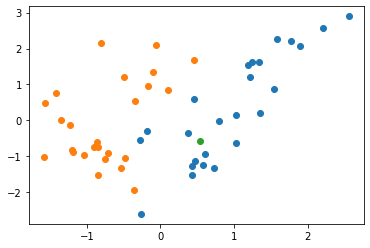

In [8]:
plt.scatter(x[y==0,0], x[y==0,1])
plt.scatter(x[y==1,0], x[y==1,1])
plt.scatter(new_p[0], new_p[1])
plt.show()

In [9]:
dist = np.sqrt((new_p[0] - x[:,0])**2 + (new_p[1] - x[:,1])**2)

In [10]:
dist

array([0.82392642, 1.31363894, 0.56208553, 1.48305026, 1.76029652,
       1.12722063, 2.31634271, 2.36103894, 1.82875796, 0.77615937,
       1.45811365, 0.67419078, 0.70787989, 1.39466013, 1.4293443 ,
       3.56201441, 0.95315923, 4.01236218, 1.98193741, 2.18460088,
       0.27239946, 1.75015039, 0.86917484, 1.69413236, 1.62669749,
       1.40047186, 3.04387361, 0.59881375, 2.25894589, 2.74415338,
       2.1664173 , 1.12445136, 2.01703308, 3.03844507, 2.05453735,
       0.7811005 , 2.35449088, 0.3601931 , 0.4922781 , 1.67960488,
       1.16986187, 1.64311334, 1.3884844 , 3.01254017, 1.75135209,
       1.29916086, 2.32706549, 1.89300823, 2.96498695, 2.20068629])

In [11]:
k=5

In [12]:
df = pd.DataFrame(x, columns=["col_1","col_2"])
df["target"] = y
df.head()

,col_1,col_2,target
0,-0.283422,-0.541162,0
1,-0.532638,-1.328350,1
2,0.475972,-1.128427,0
3,0.106972,0.848423,1
4,-1.203210,-0.814669,1


In [13]:
new_df = df.copy()

In [14]:
new_df["Dist"] = dist 

In [15]:
new_df.head()

,col_1,col_2,target,Dist
0,-0.283422,-0.541162,0,0.823926
1,-0.532638,-1.328350,1,1.313639
2,0.475972,-1.128427,0,0.562086
3,0.106972,0.848423,1,1.483050
4,-1.203210,-0.814669,1,1.760297


In [16]:
new_df.sort_values("Dist").head()

,col_1,col_2,target,Dist
20,0.374181,-0.353885,0,0.272399
37,0.603018,-0.924638,0,0.360193
38,1.029194,-0.625017,0,0.492278
2,0.475972,-1.128427,0,0.562086
27,0.794544,-0.027980,0,0.598814


In [17]:
new_p2 = np.array([1.4,-0.6])

In [18]:
new_p2

array([ 1.4, -0.6])

In [19]:
dist2 = np.sqrt((new_p2[0] - x[:,0])**2 + (new_p2[1] - x[:,1])**2)

In [20]:
dist2

array([1.68444952, 2.06532896, 1.06445405, 1.94161047, 2.61204607,
       1.93408568, 2.23968363, 3.12404713, 2.67687694, 0.98659593,
       2.31218079, 1.04649383, 1.18031043, 2.24902189, 2.09349098,
       3.27891826, 1.33140481, 3.68498393, 2.82128426, 2.6030539 ,
       1.0549297 , 2.5976108 , 0.83359312, 2.22016277, 2.46627475,
       2.26031982, 3.53301732, 0.83293703, 2.47451702, 3.07518569,
       3.00923085, 0.81483601, 2.45631831, 2.83006791, 2.6164423 ,
       1.61893118, 3.15794284, 0.86056409, 0.37164882, 2.42865356,
       1.52268794, 2.21629092, 2.20545059, 2.86072966, 1.47247699,
       2.13699204, 2.21657283, 1.80443849, 2.71231127, 2.14244183])

In [21]:
new_df["Dist"] = dist2
new_df.head()

,col_1,col_2,target,Dist
0,-0.283422,-0.541162,0,1.684450
1,-0.532638,-1.328350,1,2.065329
2,0.475972,-1.128427,0,1.064454
3,0.106972,0.848423,1,1.941610
4,-1.203210,-0.814669,1,2.612046


In [22]:
new_df.sort_values("Dist").head()

,col_1,col_2,target,Dist
38,1.029194,-0.625017,0,0.371649
31,1.346930,0.213106,0,0.814836
27,0.794544,-0.027980,0,0.832937
22,1.030773,0.147361,0,0.833593
37,0.603018,-0.924638,0,0.860564


In [23]:
from sklearn.datasets import make_moons

In [24]:
moon = make_moons(n_samples=300, noise=0.15)

In [25]:
moon 

(array([[ 1.11492166e+00, -4.41831355e-01],
        [-2.38981565e-01,  1.25805067e+00],
        [ 6.18770308e-01,  1.00497849e+00],
        [ 1.55993932e+00, -6.93014747e-02],
        [-9.44984206e-01, -1.29130437e-01],
        [-7.69900987e-01,  6.36120182e-01],
        [ 1.25504636e+00, -5.64569696e-01],
        [ 1.89603595e+00,  2.25999003e-01],
        [ 1.25852927e+00, -4.55040577e-05],
        [-5.48278360e-01,  5.91155422e-01],
        [ 9.24742225e-01, -5.78682964e-01],
        [-7.07033062e-01,  5.83281765e-01],
        [-1.16378392e+00,  3.19958736e-01],
        [ 1.00151417e+00,  3.50699878e-01],
        [ 5.09982512e-01,  1.01571557e+00],
        [-6.72933688e-02,  1.21854501e-01],
        [ 2.01019272e+00,  6.68871566e-01],
        [ 1.21741552e+00, -4.63135759e-01],
        [-2.30382020e-01,  6.73383244e-01],
        [-7.93107872e-01,  3.22124511e-01],
        [ 1.49537471e+00, -6.43894404e-01],
        [ 7.91674509e-01, -3.41014595e-01],
        [ 8.27601901e-01, -3.883

In [26]:
moon_df = pd.DataFrame(moon[0], columns=["col_1","col_2"])
moon_df["target"] = moon[1]
moon_df.head()

,col_1,col_2,target
0,1.114922,-0.441831,1
1,-0.238982,1.258051,0
2,0.618770,1.004978,0
3,1.559939,-0.069301,1
4,-0.944984,-0.129130,0


In [27]:
x = moon[0]
y = moon[1]

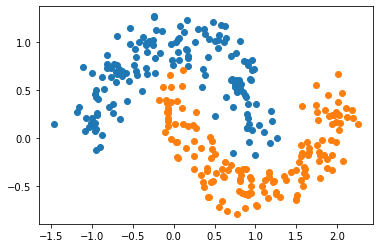

In [28]:
plt.scatter(x[y==0,0], x[y==0,1])
plt.scatter(x[y==1,0], x[y==1,1])
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size=0.75)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(x_tr))))

In [33]:
knn.fit(x_tr, y_tr)

KNeighborsClassifier(n_neighbors=15)

In [34]:
knn.score(x_tr, y_tr)

0.9866666666666667

In [35]:
y_pred = knn.predict(x_te)

In [36]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
 accuracy_score(y_pred, y_te)

0.9733333333333334

In [42]:
 confusion_matrix(y_pred, y_te)

array([[39,  2],
       [ 0, 34]], dtype=int64)

In [43]:
print(classification_report(y_pred, y_te))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.94      1.00      0.97        34

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.97      0.97      0.97        75

